# Parameter fitting for two different drug concentrations (D)

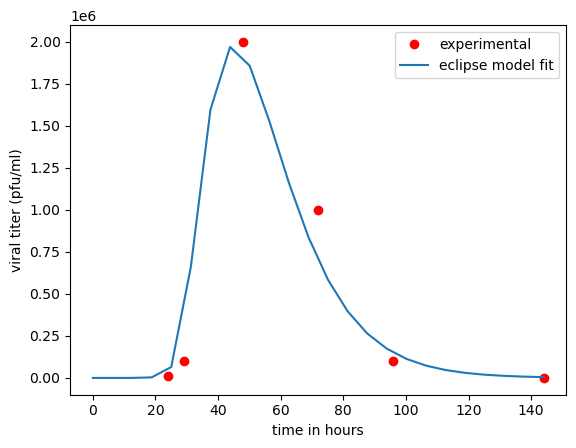

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import pandas as pd
import seaborn as sns

# For eclipse model drung concenteration equals zero micro M
beta = 23*10**-7
k = 0.17
delta = 0.075
p = 0.084
IC_50 = 0.26
epsilon_max = 0.82
D = 0
epsilon = (epsilon_max*D)/(D+IC_50)
c = 0.105

def myode(u,time):
    T,E,I,V = u[0], u[1], u[2], u[3]
    dTdt = -(1-epsilon)*beta*T*V
    dEdt = (1-epsilon)*beta*T*V - k*E
    dIdt = k*E - delta*I
    dVdt = p*I - c*V
    return [dTdt, dEdt, dIdt, dVdt]

time = np.linspace(0,144,24)
u0 = [6.7*10**6,0,6.7,0]
sol = odeint(myode, u0, time)
T, E, I, V = sol[:,0], sol[:,1], sol[:,2], sol[:,3]

#experimental data

Time = np.array([24,29,48,72,96,144])
virial_titer = np.array([10**4,10**5,2*10**6,10**6,10**5,10**3])
plt.plot(Time,virial_titer,'or',label='experimental')#experimental data plot
plt.plot(time,V,label='eclipse model fit')#fit plot
plt.xlabel("time in hours")
plt.ylabel("viral titer (pfu/ml)")
plt.legend()
plt.savefig('fit_0.png')

epsilon=0.816
=50466.122170048715


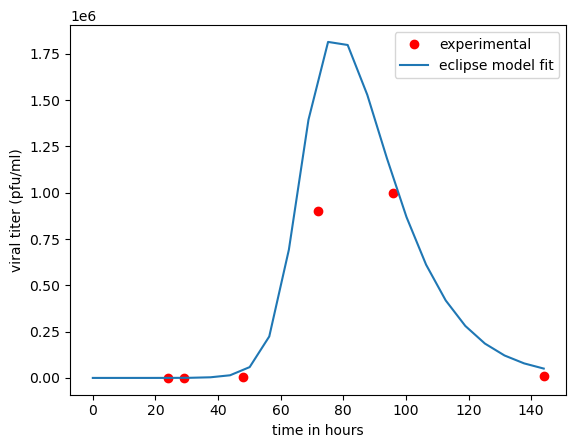

In [2]:
# For eclipse model drung concenteration equals 53.3 micro M
beta = 23*10**-7
k = 0.17
delta = 0.075
p = 0.084
IC_50 = 0.26
epsilon_max = 0.82
D = 53.3
epsilon = (epsilon_max*D)/(D+IC_50)
c = 0.105

def myode(u,time):
    T,E,I,V = u[0], u[1], u[2], u[3]
    dTdt = -(1-epsilon)*beta*T*V
    dEdt = (1-epsilon)*beta*T*V - k*E
    dIdt = k*E - delta*I
    dVdt = p*I - c*V
    return [dTdt, dEdt, dIdt, dVdt]

time = np.linspace(0,144,24)
u0 = [6.7*10**6,0,6.7,0]
sol = odeint(myode, u0, time)
T, E, I, V = sol[:,0], sol[:,1], sol[:,2], sol[:,3]

v = V[-1]
#experimental data

Time = np.array([24,29,48,72,96,144])
virial_titer = np.array([50,10**3,5*10**3,9*10**5,10**6,10**4])
plt.plot(Time,virial_titer,'or',label='experimental')#experimental data plot
plt.plot(time,V,label='eclipse model fit')#fit plot
plt.xlabel("time in hours")
plt.ylabel("viral titer (pfu/ml)")
plt.legend()
print(f'epsilon={epsilon:.3}') # used in the below cell directly
print(f'={v}')
plt.savefig('fit_53.3.png')

# Optimising data

Optimized Parameters:
Beta: 2.4519086596954263e-06
Epsilon: 0.8047558557288158
k: 0.1050563831088628
Delta: 0.18490812269957801
p: 0.2729205381513788
c: 0.1895282778361471


/Users/shesitherreddy/anaconda3/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/shesitherreddy/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


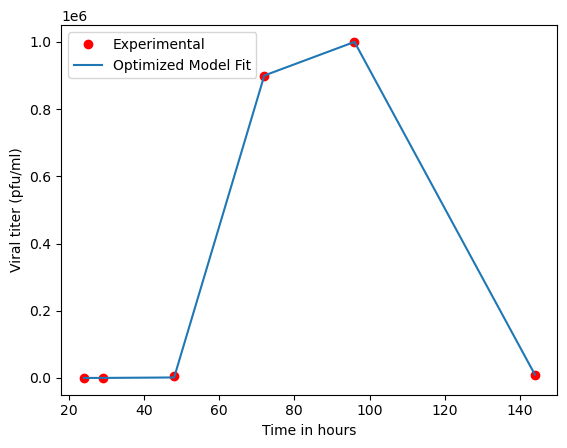

<Figure size 640x480 with 0 Axes>

In [3]:
#Optimising has been done for drug concentration of 53.3 micro molar because the epsilon value is zero for zero drug concenteration

from scipy.optimize import curve_fit

beta = 23 * 10**-7
k = 0.17
delta = 0.075
p = 0.084
epsilon = 0.816 # this was caluclated value from the above cell
c = 0.105

def myode(u, time, beta, epsilon, k, delta, p, c):
    T, E, I, V = u[0], u[1], u[2], u[3]
    dTdt = -(1 - epsilon) * beta * T * V
    dEdt = (1 - epsilon) * beta * T * V - k * E
    dIdt = k * E - delta * I
    dVdt = p * I - c * V
    return [dTdt, dEdt, dIdt, dVdt]

def fit_function(time, beta, epsilon, k, delta, p, c):
    u0 = [6.7 * 10**6, 0, 6.7, 0]
    sol = odeint(myode, u0, Time, args=(beta, epsilon, k, delta, p, c))
    return sol[:, 3]  # Return the viral titer

# Experimental data
Time = np.array([24, 29, 48, 72, 96, 144])
virial_titer = np.array([50, 10**3, 5 * 10**3, 9 * 10**5, 10**6, 10**4])

# Initial guess for parameters
initial_guess = [beta, epsilon, k, delta, p, c]

# Optimize the parameters
params, covariance = curve_fit(fit_function, Time, virial_titer, p0=initial_guess,maxfev = 5000)

# Extract the optimized parameters
beta_opt, epsilon_opt, k_opt, delta_opt, p_opt, c_opt = params

# Print the optimized parameters
print("Optimized Parameters:")
print("Beta:", beta_opt)
print("Epsilon:", epsilon_opt)
print("k:", k_opt)
print("Delta:", delta_opt)
print("p:", p_opt)
print("c:", c_opt)

# Plot experimental data
plt.plot(Time, virial_titer, 'or', label='Experimental')

# Plot optimized curve
optimized_curve = fit_function(time, beta_opt, epsilon_opt, k_opt, delta_opt, p_opt, c_opt)
plt.plot(Time, optimized_curve, label='Optimized Model Fit')

plt.xlabel("Time in hours")
plt.ylabel("Viral titer (pfu/ml)")
plt.legend()
plt.show()
plt.savefig('optimized.png')

# Bifurication analysis

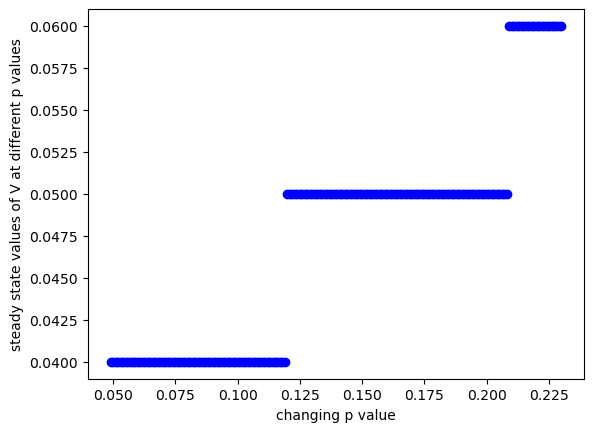

In [4]:
# p is my parameter for bifurication analysis since it has a direct relation with V and this was done for 0 micro M drug concenteration
beta = 23*10**-7
k = 0.17
delta = 0.075
IC_50 = 0.26
epsilon_max = 0.82
D = 0
epsilon = (epsilon_max*D)/(D+IC_50)
c = 0.105
p = 49
steady_V = []
P_Val = []
for i in range(p,231,1):
    
    def myode(u,time):
        T,E,I,V = u[0], u[1], u[2], u[3]
        dTdt = -(1-epsilon)*beta*T*V
        dEdt = (1-epsilon)*beta*T*V - k*E
        dIdt = k*E - delta*I
        dVdt = (i/1000)*I - c*V
        return [dTdt, dEdt, dIdt, dVdt]

    time = np.linspace(0,300,24)
    u0 = [6.7*10**6,0,6.7,0]
    sol = odeint(myode, u0, time)
    T, E, I, V = sol[:,0], sol[:,1], sol[:,2], sol[:,3]
    final_V = V[-1]
    steady_V.append(float("{:.2f}".format(final_V)))
    P_Val.append(float("{:.3f}".format(i/1000)))
plt.plot(P_Val,steady_V,'ob')
plt.xlabel('changing p value')
plt.ylabel('steady state values of V at different p values')
plt.savefig('bifurication_1.png')

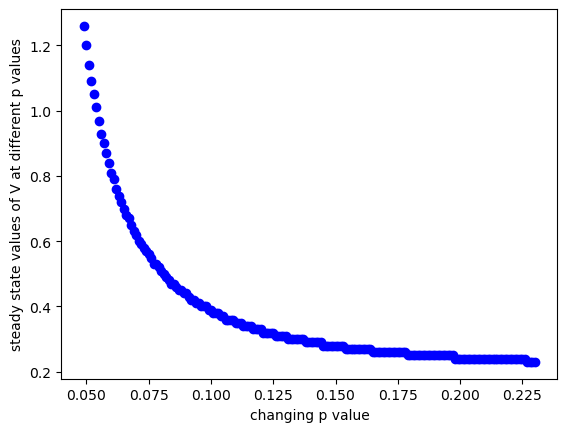

In [5]:
beta = 23*10**-7
k = 0.17
delta = 0.075
IC_50 = 0.26
epsilon_max = 0.82
D = 53.3
epsilon = (epsilon_max*D)/(D+IC_50)
c = 0.105
p = 49
steady_V = []
P_Val = []
for i in range(p,231,1):
    
    def myode(u,time):
        T,E,I,V = u[0], u[1], u[2], u[3]
        dTdt = -(1-epsilon)*beta*T*V
        dEdt = (1-epsilon)*beta*T*V - k*E
        dIdt = k*E - delta*I
        dVdt = (i/1000)*I - c*V
        return [dTdt, dEdt, dIdt, dVdt]

    time = np.linspace(0,300,24)
    u0 = [6.7*10**6,0,6.7,0]
    sol = odeint(myode, u0, time)
    T, E, I, V = sol[:,0], sol[:,1], sol[:,2], sol[:,3]
    final_V = V[-1]
    steady_V.append(float("{:.2f}".format(final_V)))
    P_Val.append(float("{:.3f}".format(i/1000)))
plt.plot(P_Val,steady_V,'ob')
plt.xlabel('changing p value')
plt.ylabel('steady state values of V at different p values')
plt.savefig('bifurication_2.png')

# Sensitivity analysis

50454.55616316215


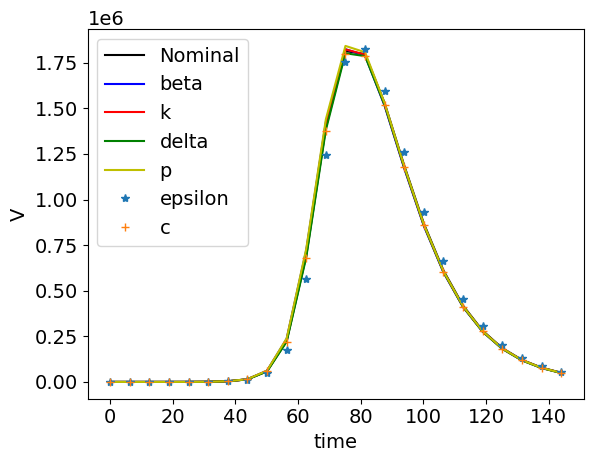

In [6]:
def func(x,t, beta, k, delta, p, epsilon, c):
    T,E,I,V = x;
    return [-(1-epsilon)*beta*T*V,(1-epsilon)*beta*T*V - k*E, k*E - delta*I,p*I - c*V]


timesteps = np.linspace(0,144,24)
y0 = [6.7*10**6,0,6.7,0];

y = odeint(func, y0, timesteps, args = (23*10**-7,0.17,0.075,0.084,0.816,0.105))
y1 = odeint(func, y0, timesteps, args = ((23*10**-7)*1.01,0.17,0.075,0.084,0.816,0.105))
y2 = odeint(func, y0, timesteps, args = (23*10**-7,0.17*1.01,0.075,0.084,0.816,0.105))
y3 = odeint(func, y0, timesteps, args = (23*10**-7,0.17,0.075*1.01,0.084,0.816,0.105))
y4 = odeint(func, y0, timesteps, args = (23*10**-7,0.17,0.075,0.084*1.01,0.816,0.105))
y5 = odeint(func, y0, timesteps, args = (23*10**-7,0.17,0.075,0.084,0.816*1.01,0.105))
y6 = odeint(func, y0, timesteps, args = (23*10**-7,0.17,0.075,0.084,0.816,0.105*1.01))

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("V")
plt.plot(timesteps, y[:,3],'k', label = "Nominal");
plt.plot(timesteps, y1[:,3],'b', label = "beta");
plt.plot(timesteps, y2[:,3],'r', label = "k");
plt.plot(timesteps, y3[:,3],'g', label = "delta");
plt.plot(timesteps, y4[:,3],'y', label = "p");
plt.plot(timesteps, y5[:,3],'*', label = "epsilon");
plt.plot(timesteps, y6[:,3],'+', label = "c");

plt.legend()

# PRint the final value of P for our nominal parameter set. This will be needed later.
print(y[-1,3])
plt.savefig('local sensitivity_1.png')

/var/folders/l9/hn8y38kj3h57fnmnb71xfkf80000gn/T/ipykernel_13815/2145710773.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(timesteps, ((y1[:,3] - y[:,3])/y[:,3])/0.01,'b', label = "beta");
/var/folders/l9/hn8y38kj3h57fnmnb71xfkf80000gn/T/ipykernel_13815/2145710773.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(timesteps, ((y2[:,3] - y[:,3])/y[:,3])/0.01,'r', label = "k");
/var/folders/l9/hn8y38kj3h57fnmnb71xfkf80000gn/T/ipykernel_13815/2145710773.py:6: RuntimeWarning: invalid value encountered in divide
  plt.plot(timesteps,((y3[:,3] - y[:,3])/y[:,3])/0.01,'g', label = "delta");
/var/folders/l9/hn8y38kj3h57fnmnb71xfkf80000gn/T/ipykernel_13815/2145710773.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(timesteps, ((y4[:,3] - y[:,3])/y[:,3])/0.01,'k', label = "p");
/var/folders/l9/hn8y38kj3h57fnmnb71xfkf80000gn/T/ipykernel_13815/2145710773.py:8: RuntimeWarning: invalid value encountered in divide
  plt.plot(timesteps, ((y5[:

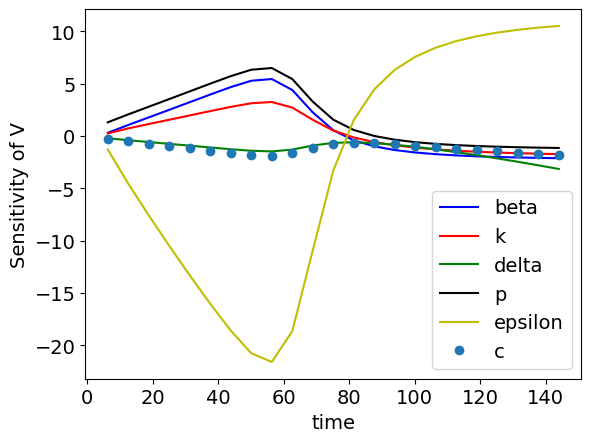

In [7]:
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("Sensitivity of V")
plt.plot(timesteps, ((y1[:,3] - y[:,3])/y[:,3])/0.01,'b', label = "beta");
plt.plot(timesteps, ((y2[:,3] - y[:,3])/y[:,3])/0.01,'r', label = "k");
plt.plot(timesteps,((y3[:,3] - y[:,3])/y[:,3])/0.01,'g', label = "delta");
plt.plot(timesteps, ((y4[:,3] - y[:,3])/y[:,3])/0.01,'k', label = "p");
plt.plot(timesteps, ((y5[:,3] - y[:,3])/y[:,3])/0.01,'y', label = "epsilon");
plt.plot(timesteps,((y6[:,3] - y[:,3])/y[:,3])/0.01,'o', label = "c");
plt.legend()
plt.savefig('local sensitivity_2.png')

# remark

From the above plot we can see that epsilon is more sensitive followed by p than the other parameters

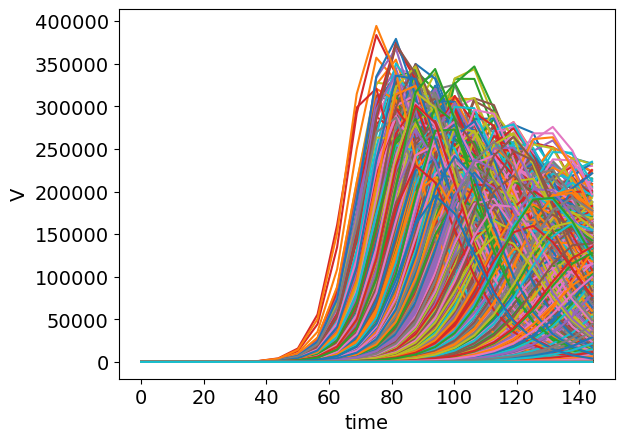

In [8]:
N = 5000;
beta = np.random.uniform((23*10**-7)*.8,(23*10**-7)*1.2,N);
k = np.random.uniform(0.17*.8,0.17*1.2,N);
delta = np.random.uniform(0.75*.8,0.75*1.2,N);
p = np.random.uniform(0.084*.8,0.084*1.2,N);
epsilon = np.random.uniform(0.816*.8,0.816*1.2,N);
c = np.random.uniform(0.105*.8,0.105*1.2,N);

V = np.zeros(N);

for m in np.arange(0,N,1):
    output = odeint(func, y0, timesteps, args = (beta[m],k[m],delta[m],p[m],epsilon[m],c[m]));
    plt.plot(timesteps,output[:,3]);
    plt.xlabel("time");
    plt.ylabel("V");
    V[m]=output[-1,3];
plt.savefig('global sensitivity_1.png')

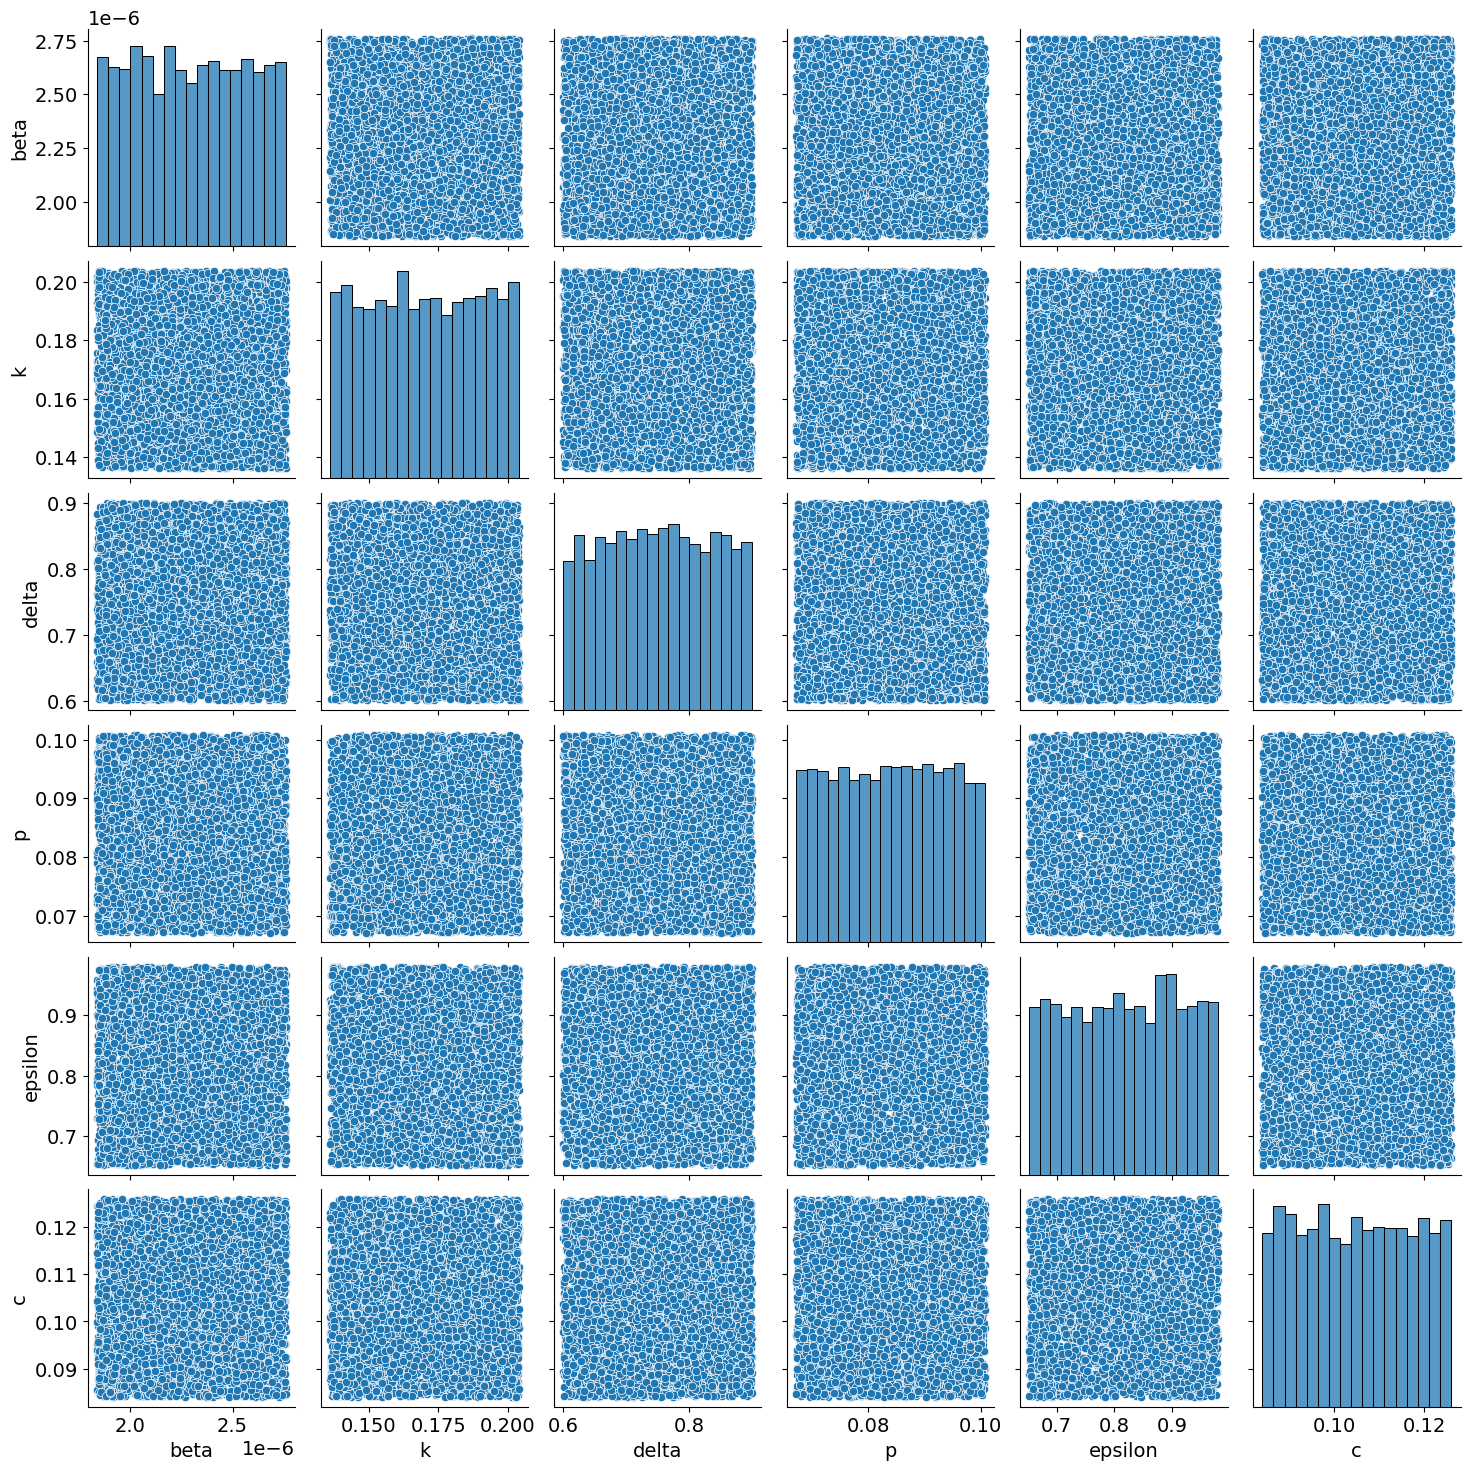

<Figure size 640x480 with 0 Axes>

In [9]:
tmp = {'beta':beta, 'k':k, 'delta':delta, 'p':p, 'epsilon':epsilon, 'c':c};
df = pd.DataFrame(tmp);
del(tmp)

sns.pairplot(df)
20
plt.show()
plt.savefig('global sensitivity.png')

Our fitted equn is y =  -0.19555358445839896 beta +  -0.2987374350469606 k + -0.027787494613055453 delta + 0.5423330866633533 p +  -0.04845850101584129 epsilon + -0.9329770400104995 c


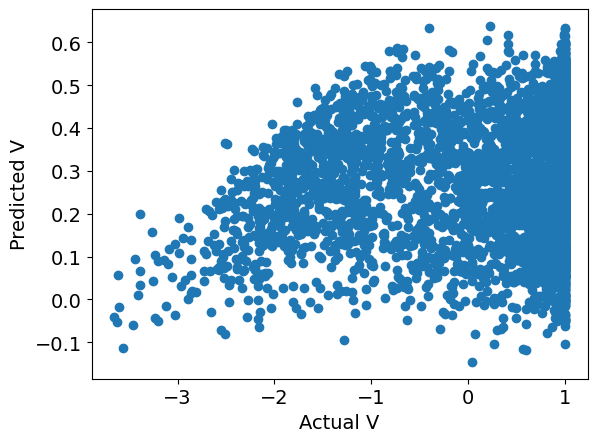

In [10]:
# Normalize y
y = (50455-V)/50455; # See first set of code to find this number


# Build our X. Normalize values
X = np.c_[((23*10**-7)-beta)/(23*10**-7),(.17-k)/.17,(0.075-delta)/0.075,(0.084-p)/0.084,(0.086-epsilon)/epsilon,(0.105-c)/c]


#===================================================

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ y;
print("Our fitted equn is y = ",params[0], "beta + ", params[1], "k +", params[2],"delta +",params[3], "p + ", params[4], "epsilon +", params[5],"c")

plt.plot(y,X @ params,"o");
plt.ylabel("Predicted V");
plt.xlabel("Actual V");
plt.savefig('global sensitivity_3.png')